In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


from amb_scripts.load_saved_info import *
from amb_scripts.utils import *

from dag_prf_utils.prfpy_functions import *
from dag_prf_utils.plot_functions import *
from dag_prf_utils.utils import *
from dag_prf_utils.mesh_maker import *

from scipy.io import loadmat

from prfpy.rf import csenf_exponential

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
sub = 'sub-02'
ses_list = ['ses-1', 'ses-2']
qCSF_info = {}
qCSF_info['ses-1'] = amb_load_qcsf(sub, eye_list=['L', 'R'], ses='ses-1')
qCSF_info['ses-2'] = amb_load_qcsf(sub, eye_list=['L', 'R'], ses='ses-2')


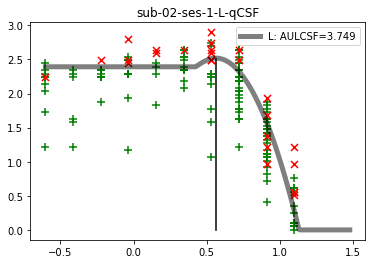

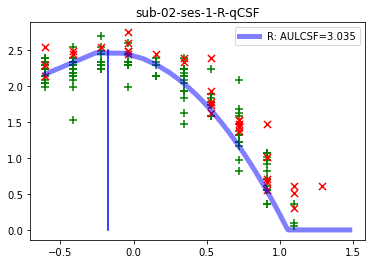

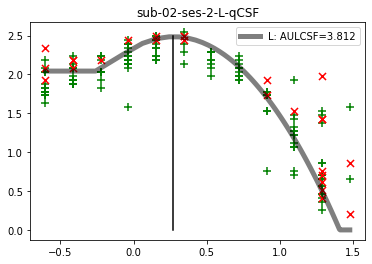

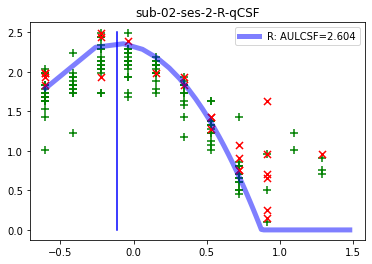

In [25]:
SFs = np.linspace(.25, 30, 100)
for ses in ses_list:
    for eye in ['L', 'R']:
        plt.figure()
        plt.title(f'{sub}-{ses}-{eye}-qCSF')
        b_log_csf = qcsf_curve(
            SFs,
            qCSF_info[ses][eye]['peakCS'],
            qCSF_info[ses][eye]['peakSF'],
            qCSF_info[ses][eye]['bdwth'],
            qCSF_info[ses][eye]['lowSFtrunc'],
        )
        if eye=='L':
            col ='k'
        else:
            col='b'
        plt.plot(
            np.log10(SFs), 
            b_log_csf, 
            color=col, 
            linewidth=5,
            alpha=0.5,
            label=f'{eye}: AULCSF={qCSF_info[ses][eye]["AULCSF"]:.3f}')
        correct = qCSF_info[ses][eye]['CORRECT_history'] == 1
        plt.scatter(
            np.log10(qCSF_info[ses][eye]['SF_history'][correct]),
            np.log10(1/qCSF_info[ses][eye]['CON_history'][correct]),
            s=50,
            color ='g',
            marker='+',
            alpha=1,
            )
        plt.scatter(
            np.log10(qCSF_info[ses][eye]['SF_history'][~correct]),
            np.log10(1/qCSF_info[ses][eye]['CON_history'][~correct]),
            s=50,
            color = 'r',
            marker='x',
            alpha=1,
            )        
        # Also plot max
        ylim = (0,2.5)
        this_peakSF = qCSF_info[ses][eye]['peakSF']
        plt.plot((this_peakSF,this_peakSF), ylim, color=col)
        plt.legend()

In [11]:
p_label = ['peakCS', 'peakSF', 'bdwth', 'lowSFtrunc', 'AULCSF']
print(sub)
for eye in ['L', 'R']:    
    print(f'Eye = {eye}')
    for ses in ses_list:
        print(f'{ses}')
        for p in p_label:
            print(f'{p:>10} = {qCSF_info[ses][eye][p]:.3f}')
            # qCSF_info['L'].keys()
    
    print('')

sub-02
Eye = L
ses-1
    peakCS = 2.521
    peakSF = 0.561
     bdwth = 0.116
lowSFtrunc = -0.889
    AULCSF = 3.749
ses-2
    peakCS = 2.485
    peakSF = 0.273
     bdwth = 0.419
lowSFtrunc = -0.354
    AULCSF = 3.812

Eye = R
ses-1
    peakCS = 2.471
    peakSF = -0.171
     bdwth = 0.453
lowSFtrunc = -0.502
    AULCSF = 3.035
ses-2
    peakCS = 2.360
    peakSF = -0.116
     bdwth = 0.371
lowSFtrunc = -0.140
    AULCSF = 2.604



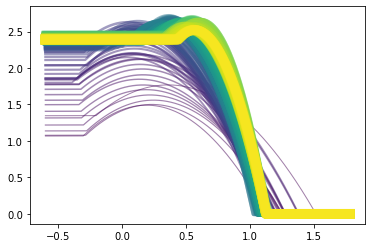

In [43]:
# # Translation of plot_qCSF
def mat2py_plotqCSF(qCSF_info):
    ntrial = qCSF_info['SF_history'].shape[0]
    rgb    = [[.6, .6, .6], [1, .2, .2], [0, 0, 0]]
    lineStyle = ['-','-','--']
    # figure('color','white','units','normalized','outerposition',[0 0 .75 .75])
    qcsf_param = qCSF_info['est_params']
    SF_list = qCSF_info['SF_list']
    maxSF = 60 # for fit
    SFsmooth = np.logspace(
        np.log10(np.min(SF_list)), 
        np.log10(maxSF),
        10000)
    plt.figure()
    for trial in range(ntrial):    
        this_col = dag_get_col_vals(trial, cmap='viridis', vmin=0, vmax=ntrial)
        this_lw = dag_rescale_bw(trial, 0, ntrial, 1, 10)
        this_CSF = qcsf_curve(
            SFsmooth, 
            peakCS = qCSF_info['est_peakCS'][trial], 
            peakSF = qCSF_info['est_peakSF'][trial], 
            bdwth = qCSF_info['est_bdwth'][trial], 
            lowSFtrunc = qCSF_info['est_lowSFtrunc'][trial]
            )
        plt.plot(
            np.log10(SFsmooth), 
            this_CSF, 
            color=this_col, 
            linewidth=this_lw,
            alpha=0.5,
            label='trial')    
a = amb_load_qcsf(sub, eye_list=['L'], ses='ses-1')['L']
mat2py_plotqCSF(a)


In [37]:
1e4

10000.0

In [40]:
this_q.keys()
# this_q['SF_list']

dict_keys(['SF_list', 'SF_history', 'CON_history', 'CORRECT_history', 'params', 'peakCS', 'peakSF', 'bdwth', 'lowSFtrunc', 'sensitivity', 'AULCSF', 'est_params', 'est_peakCS', 'est_peakSF', 'est_bdwth', 'est_lowSFtrunc', 'est_sensitivity', 'est_AULCSF'])

In [33]:
a = amb_load_qcsf(sub, eye_list=['L'], ses='ses-1')['L']
a['est_params'].shape

(150, 4)